In [65]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
plt.rcParams['figure.figsize'] = [8, 4.5]

In [66]:
data_root = Path("benchmarks/results/whisper_benchmark")

In [67]:
datasets = {p.stem.removeprefix("NVIDIA"): pd.read_csv(p) for p in data_root.glob("*.csv")}

Text(0.5, 0, 'Model Size')

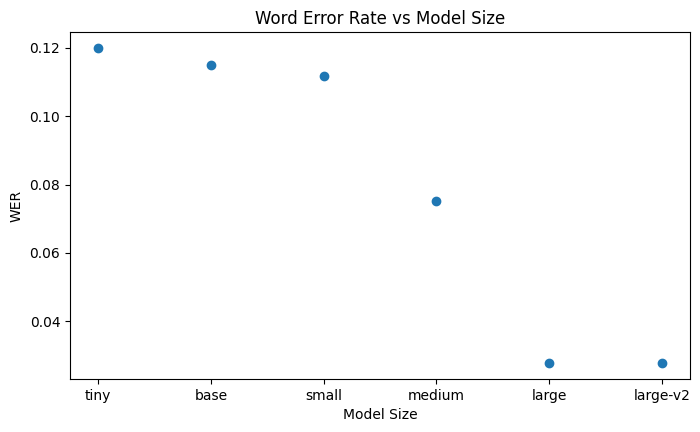

In [68]:
data = next(iter(datasets.values()))
plt.plot(data["model_size"], data["wer"], "o")
plt.title("Word Error Rate vs Model Size")
plt.ylabel("WER")
plt.xlabel("Model Size")
    # plt.ylim((0,1.1))

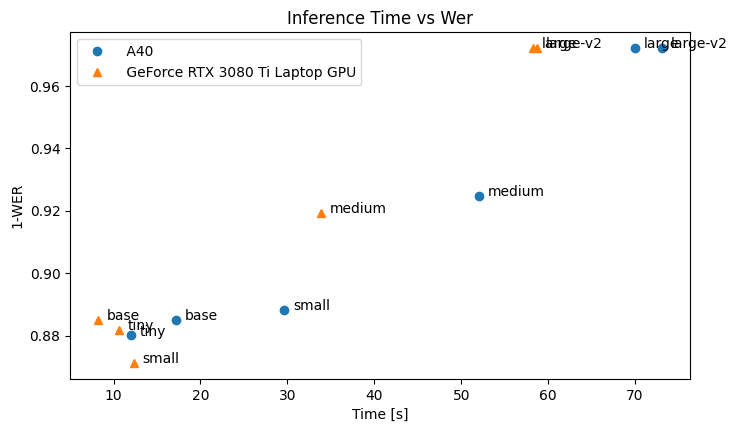

In [82]:
markers = iter(["o", "^"])
for gpu, data in datasets.items():
    x = data["time"]
    y = 1-data["wer"]
    plt.plot(x ,y , next(markers), label=gpu)
    plt.title("Inference Time vs Wer")
    plt.legend()
    plt.xlabel("Time [s]")
    plt.ylabel("1-WER")
    #plt.ylim(bottom=0)

    for index, size in data["model_size"].items():
        plt.annotate(size, (x[index] + 1, y[index]))

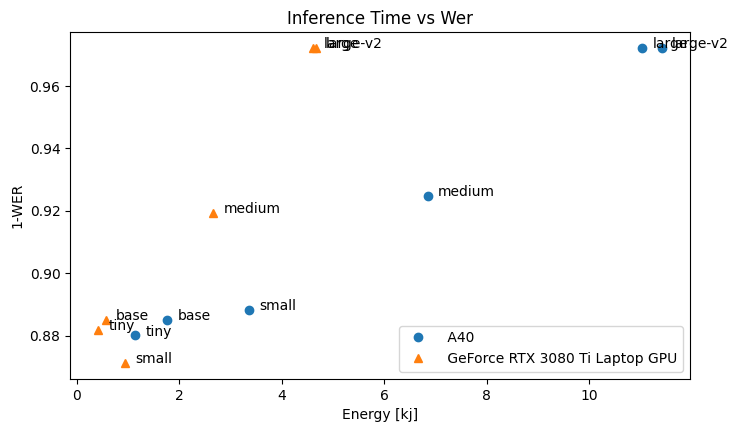

In [75]:
markers = iter(["o", "^"])
for gpu, data in datasets.items():
    x = data["energy"] / 1_000
    y = 1-data["wer"]
    plt.plot(x ,y , next(markers), label=gpu)
    plt.title("Inference Time vs Wer")
    plt.legend()
    plt.xlabel("Energy [kj]")
    plt.ylabel("1-WER")
    # plt.ylim(bottom=0)

    for index, size in data["model_size"].items():
        plt.annotate(size, (x[index] + 0.2, y[index]))

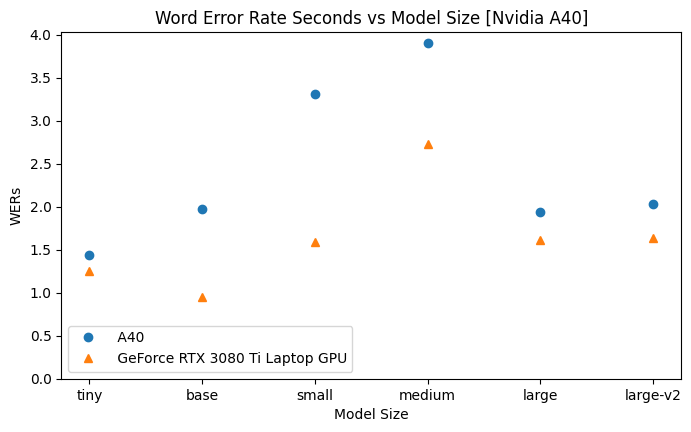

In [80]:
markers = iter(["o", "^"])
for gpu, data in datasets.items():
    x = data["model_size"]
    y = data["wer"] * data["time"]
    plt.plot(x ,y , next(markers), label=gpu)

    plt.xlabel("Model Size")
    plt.ylabel("WERs")
    plt.ylim(bottom=0)

plt.title("Word Error Rate Seconds vs Model Size [Nvidia A40]")
plt.legend()
# plt.ylabel("WERs")
# 
# # plt.ylim((0,1.1))
# plt.legend(["A40", "RTX 3080 Ti (M)"])

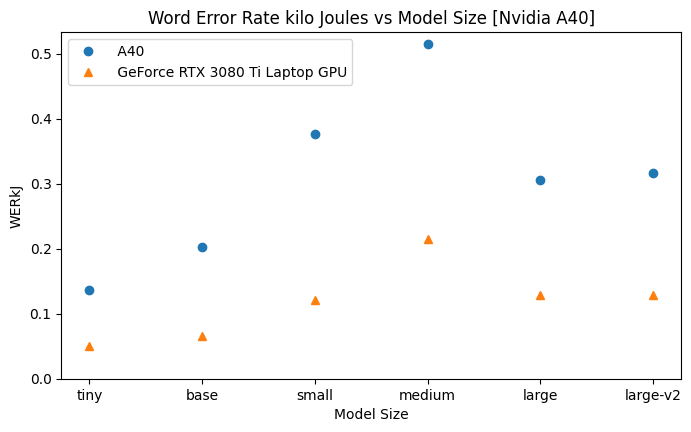

In [83]:
markers = iter(["o", "^"])
for gpu, data in datasets.items():
    x = data["model_size"]
    y = data["wer"] * data["energy"] / 1_000
    plt.plot(x ,y , next(markers), label=gpu)

    plt.xlabel("Model Size")
    plt.ylabel("WERkJ")
    plt.ylim(bottom=0)

plt.title("Word Error Rate kilo Joules vs Model Size [Nvidia A40]")
plt.legend()
# plt.ylabel("WERs")
# 
# # plt.ylim((0,1.1))
# plt.legend(["A40", "RTX 3080 Ti (M)"])

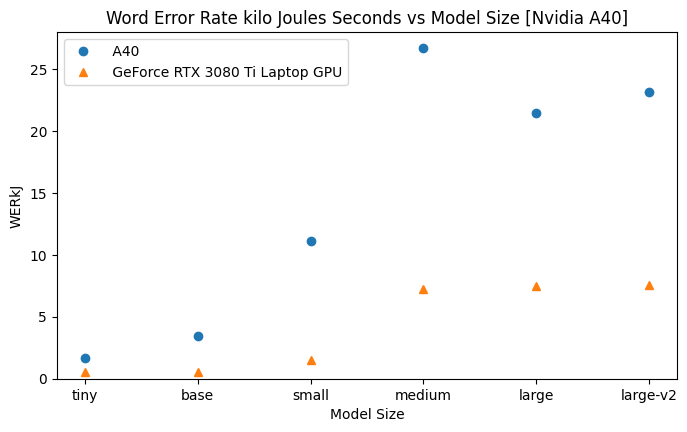

In [84]:
markers = iter(["o", "^"])
for gpu, data in datasets.items():
    x = data["model_size"]
    y = data["wer"] * data["energy"] / 1_000 * data["time"]
    plt.plot(x ,y , next(markers), label=gpu)

    plt.xlabel("Model Size")
    plt.ylabel("WERkJ")
    plt.ylim(bottom=0)

plt.title("Word Error Rate kilo Joules Seconds vs Model Size [Nvidia A40]")
plt.legend()
# plt.ylabel("WERs")
# 
# # plt.ylim((0,1.1))
# plt.legend(["A40", "RTX 3080 Ti (M)"])

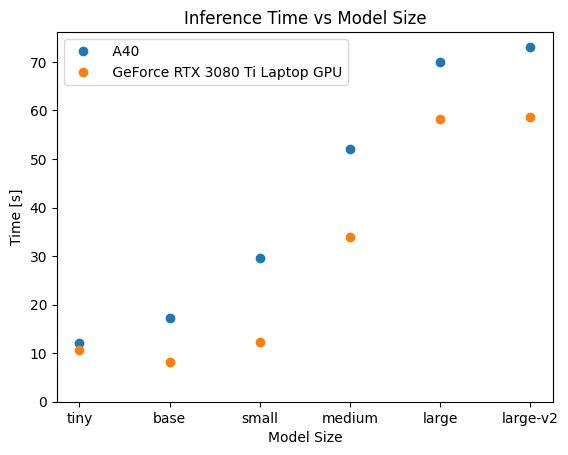

In [45]:
for gpu, data in datasets.items():
    plt.plot(data["model_size"], data["time"], "o", label=gpu)
    plt.title("Inference Time vs Model Size")
    plt.legend()
    plt.ylabel("Time [s]")
    plt.xlabel("Model Size")
    plt.ylim(bottom=0)

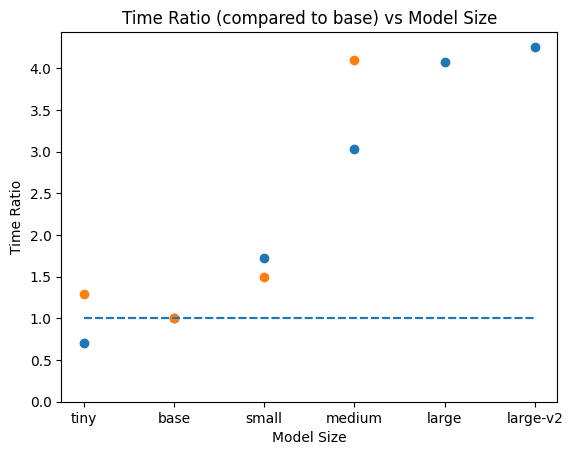

In [46]:
for gpu, data in datasets.items():
    plt.plot(data["model_size"], data["time"]/data[data["model_size"] == "base"]["time"].iloc[0], "o")
    plt.title("Time Ratio (compared to base) vs Model Size")
    plt.ylabel("Time Ratio")
    plt.xlabel("Model Size")
    plt.ylim(bottom=0)
    plt.hlines(1,0,5, linestyles="dashed")

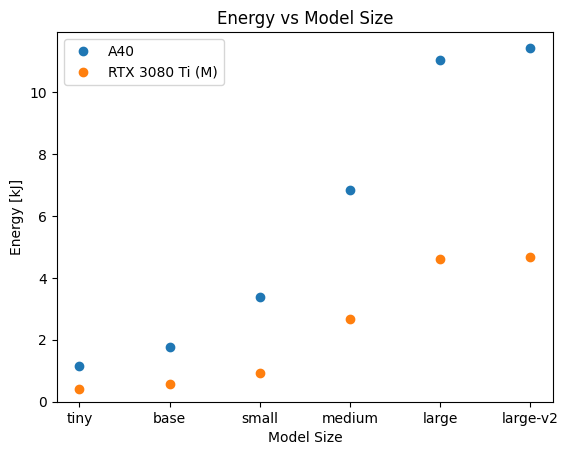

In [47]:
for gpu, data in datasets.items():
    plt.plot(data["model_size"], data["energy"]/1_000, "o")
    plt.title("Energy vs Model Size")
    plt.legend(["A40", "RTX 3080 Ti (M)"])
    plt.ylabel("Energy [kJ]")
    plt.xlabel("Model Size")
    plt.ylim(bottom=0)

(0.0, 2.6629698079139366)

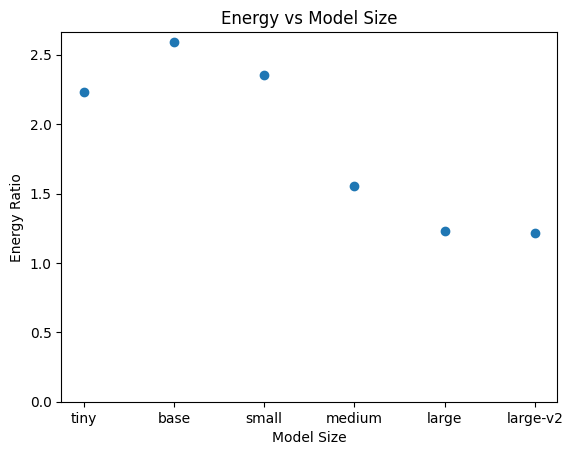

In [8]:
plt.plot(data["model_size"], data["energy"]/ razer["energy"], "o")
plt.title("Energy Ratio vs Model Size")
plt.ylabel("Energy Ratio")
plt.xlabel("Model Size")
plt.ylim(bottom=0)

(0.0, 1652.3554120002946)

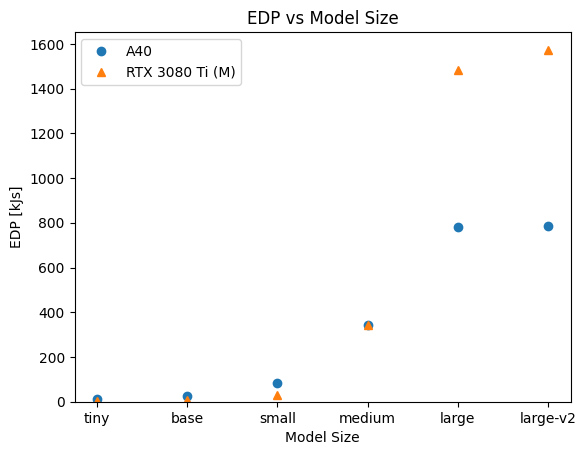

In [9]:
plt.plot(data["model_size"], data["energy"]/1_000_000*data["time"], "o")
plt.plot(razer["model_size"], razer["energy"]/1_000_000*razer["time"], "^")
plt.title("EDP vs Model Size")
plt.legend(["A40", "RTX 3080 Ti (M)"])
plt.ylabel("EDP [kJs]")
plt.xlabel("Model Size")
plt.ylim(bottom=0)

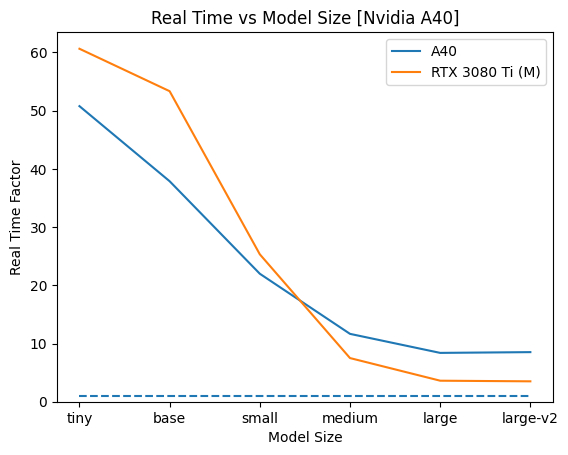

In [10]:
plt.plot(data["model_size"], 600/data["time"])
plt.plot(razer["model_size"], 600/razer["time"])
plt.title("Real Time vs Model Size [Nvidia A40]")
plt.ylabel("Real Time Factor")
plt.xlabel("Model Size")
plt.legend(["A40", "RTX 3080 Ti (M)"])
plt.ylim(bottom=0)
plt.hlines(1,0,5, linestyles="dashed")

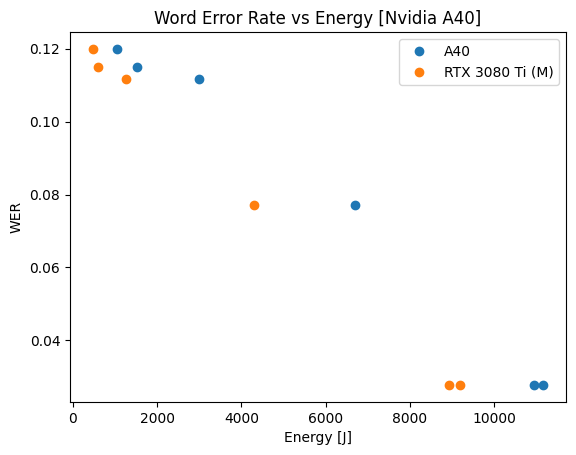

In [16]:
plt.plot( data["energy"]/1000, data["wer"], "o")
plt.plot( razer["energy"]/1000, data["wer"], "o")
plt.title("Word Error Rate vs Energy [Nvidia A40]")
plt.ylabel("WER")
plt.xlabel("Energy [J]")
#plt.ylim((0,1.1))
plt.legend(["A40", "RTX 3080 Ti (M)"])

Text(0.5, 0, 'Time [s]')

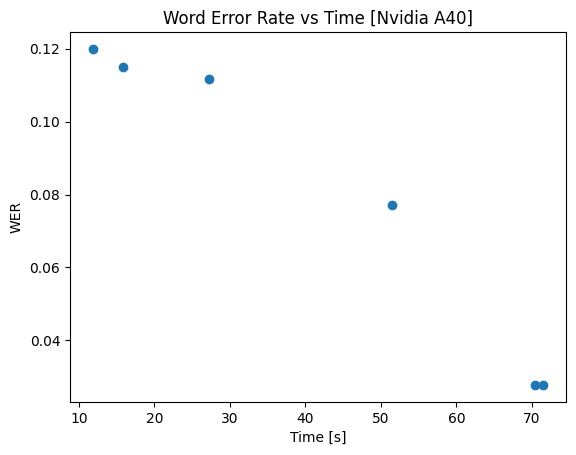

In [12]:
plt.plot(data["time"], data["wer"], "o")
plt.title("Word Error Rate vs Time [Nvidia A40]")
plt.ylabel("WER")
plt.xlabel("Time [s]")
#plt.ylim((0,1.1))

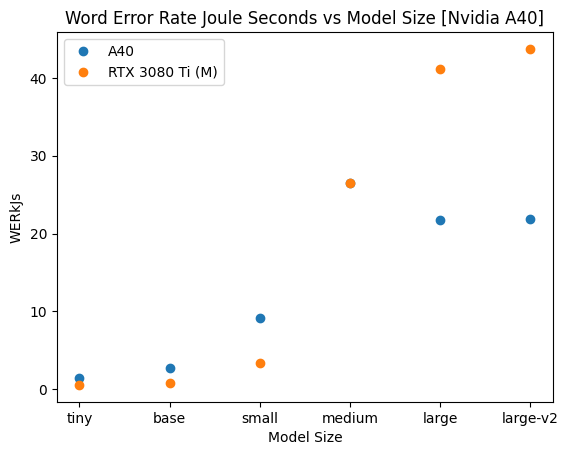

In [18]:
plt.plot(data["model_size"] ,data["wer"]*data["energy"]/1_000_000*data["time"], "o")
plt.plot(razer["model_size"] ,data["wer"]*razer["energy"]/1_000_000*razer["time"], "o")
plt.title("Word Error Rate Joule Seconds vs Model Size [Nvidia A40]")
plt.ylabel("WERkJs")
plt.xlabel("Model Size")
# plt.ylim((0,1.1))
plt.legend(["A40", "RTX 3080 Ti (M)"])